In [50]:
data_folder = "./data"
dataset_name = "ObesityDataSet_raw_and_data_sinthetic.csv"

import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", -1)

import sys
np.set_printoptions(threshold=sys.maxsize)

<ipython-input-50-a1b4d917160b>:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [26]:
# Import the data

data = pd.read_csv(data_folder + "/" + dataset_name)

data

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000  64.000000   yes                             
1     Female  21.000000  1.520000  56.000000   yes                             
2     Male    23.000000  1.800000  77.000000   yes                             
3     Male    27.000000  1.800000  87.000000   no                              
4     Male    22.000000  1.780000  89.800000   no                              
5     Male    29.000000  1.620000  53.000000   no                              
6     Female  23.000000  1.500000  55.000000   yes                             
7     Male    22.000000  1.640000  53.000000   no                              
8     Male    24.000000  1.780000  64.000000   yes                             
9     Male    22.000000  1.720000  68.000000   yes                             
10    Male    26.000000  1.850000  105.000000  yes                             
11    Female  21.000000  1.720000  80.000000   yes                             
12    Male    22.000000  1.650000  56.000000   no                              
13    Male    41.000000  1.800000  99.000000   no                              
14    Male    23.000000  1.770000  60.000000   yes                             
15    Female  22.000000  1.700000  66.000000   yes                             
16    Male    27.000000  1.930000  102.000000  yes                             
17    Female  29.000000  1.530000  78.000000   no                              
18    Female  30.000000  1.710000  82.000000   yes                             
19    Female  23.000000  1.650000  70.000000   yes                             
20    Male    22.000000  1.650000  80.000000   yes                             
21    Female  52.000000  1.690000  87.000000   yes                             
22    Female  22.000000  1.650000  60.000000   yes                             
23    Female  22.000000  1.600000  82.000000   yes                             
24    Male    21.000000  1.850000  68.000000   yes                             
25    Male    20.000000  1.600000  50.000000   yes                             
26    Male    21.000000  1.700000  65.000000   yes                             
27    Female  23.000000  1.600000  52.000000   no                              
28    Male    19.000000  1.750000  76.000000   yes                             
29    Male    23.000000  1.680000  70.000000   no                              
30    Male    29.000000  1.770000  83.000000   no                              
31    Female  31.000000  1.580000  68.000000   yes                             
32    Female  24.000000  1.770000  76.000000   no                              
33    Male    39.000000  1.790000  90.000000   no                              
34    Male    22.000000  1.650000  62.000000   no                              
35    Female  21.000000  1.500000  65.000000   yes                             
36    Female  22.000000  1.560000  49.000000   no                              
37    Female  21.000000  1.600000  48.000000   no                              
38    Male    23.000000  1.650000  67.000000   yes                             
39    Female  21.000000  1.750000  88.000000   yes                             
40    Female  21.000000  1.670000  75.000000   yes                             
41    Male    23.000000  1.680000  60.000000   no                              
42    Female  21.000000  1.660000  64.000000   yes                             
43    Male    21.000000  1.660000  62.000000   yes                             
44    Male    21.000000  1.810000  80.000000   no                              
45    Female  21.000000  1.530000  65.000000   yes                             
46    Male    21.000000  1.820000  72.000000   yes                             
47    Male    21.000000  1.750000  72.000000   yes                             
48    Female  20.000000  1.660000  60.000000   yes                             
49    

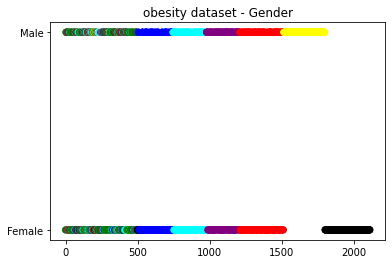

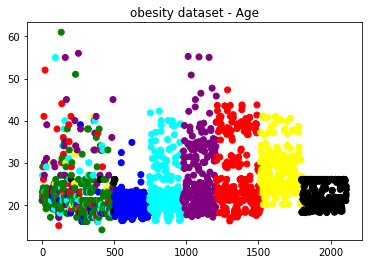

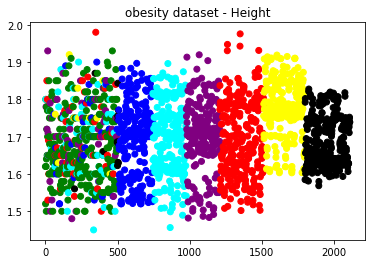

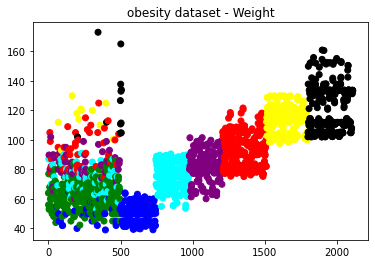

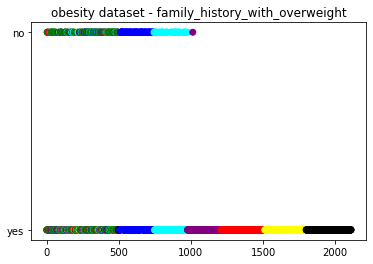

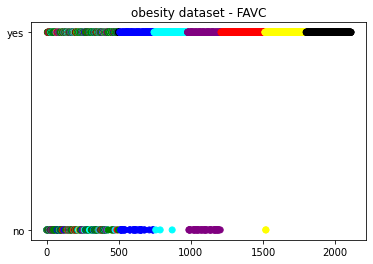

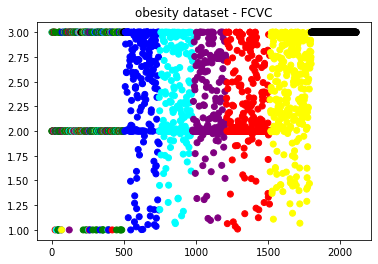

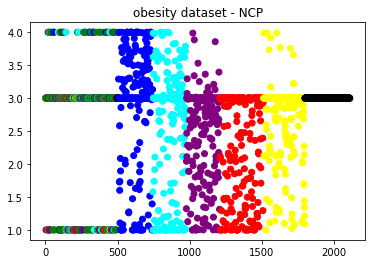

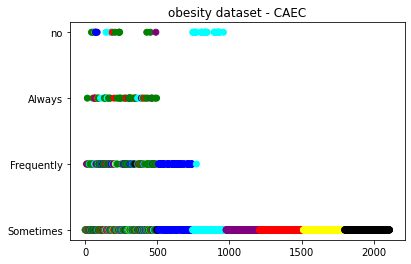

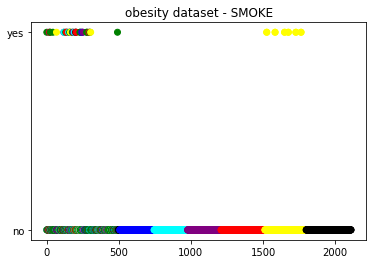

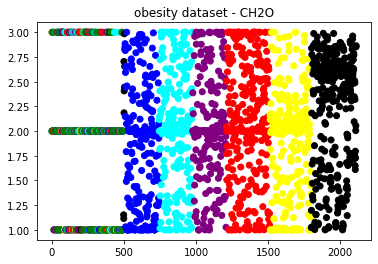

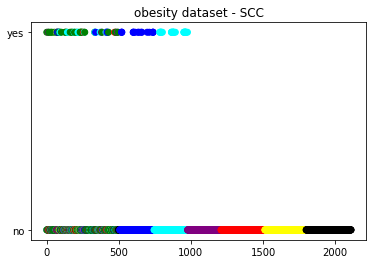

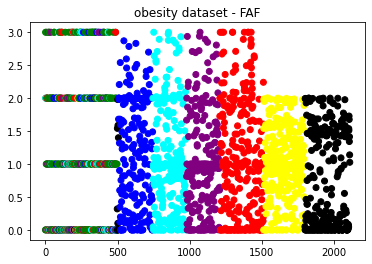

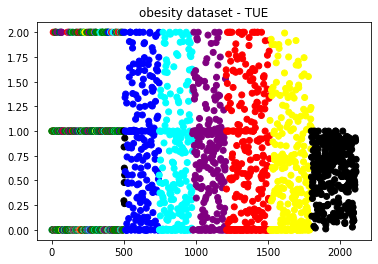

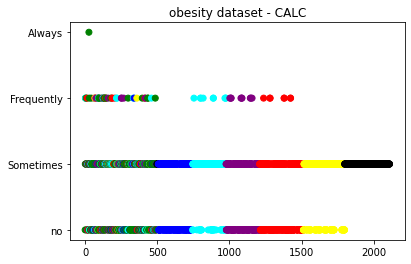

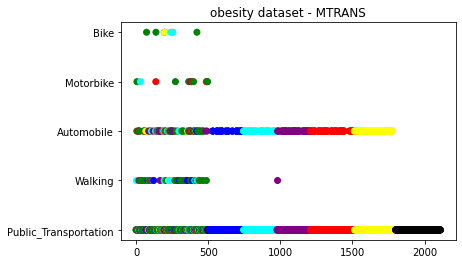

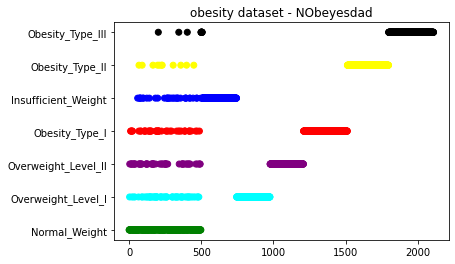

In [27]:
import matplotlib.pyplot as plt

data_colors = {"Insufficient_Weight":"blue","Normal_Weight":"green","Overweight_Level_I":"cyan","Overweight_Level_II":"purple","Obesity_Type_I":"red","Obesity_Type_II":"yellow","Obesity_Type_III":"black", "Obese":"red"}

def graph_attribute(data, dataset_name, attribute, solution):
    plt.title(dataset_name + " dataset - " + attribute)
    plt.scatter(data.index, data[attribute], color=data[solution].map(data_colors))
    plt.show()

for col in data:
    graph_attribute(data, "obesity", col, "NObeyesdad")

In [135]:
# Design decision - not enough samples from level III and level II.
# Data as it stands will provide a very, very biased dataset in all
# the wrong ways and will not be useful to achieve the goal we want.
#
# Therefore, do two things:
#    1. Eliminate synthetic dataset rows (excessive and unecessary)
#    2. Combine all levels of obesity into one class
#
# The end solution will be able to provide suggestions to move 
# between levels 1-5: underweight, normal, overweight I, 
# overweight II, and obese. Obviously a blow to profitability
# and/or usefulness, but better than something that is uselessly
# and unfairly biased. 

use_synthetic_data = True

data = pd.read_csv(data_folder + "/" + dataset_name)

# Remove synthetic dataset (begins at 498, as evidenced by float age values)
if use_synthetic_data is not True:
    for i in range(len(data)-1, 497, -1):
        data = data.drop(i, axis=0)

# Generate new, combined solution column
solution_column = []
for i in range(0, len(data)):
    row = data.iloc[i]
    row_solution = row["NObeyesdad"]
    if(row_solution == "Obesity_Type_I" 
       or row_solution == "Obesity_Type_II"
       or row_solution == "Obesity_Type_III"):
        solution_column.append("Obese")
    else:
        solution_column.append(row_solution)
    
# Remove original solution column
data = data.drop("NObeyesdad", axis=1)

# Remove the weight column so as to fit our problem statement
# (Given habits of a person, deduce what habits need to change
# so that we can get them to a healthier stage)
data = data.drop("Weight", axis=1)

# Remove additional columns to reduce the risk of developing
# Unhealthy biases for the wrong reason (small sample size)
data = data.drop("Age", axis=1)
data = data.drop("Height", axis=1)

data["solution"] = solution_column
data

Gender family_history_with_overweight FAVC      FCVC       NCP  \
0     Female  yes                            no   2.000000  3.000000   
1     Female  yes                            no   3.000000  3.000000   
2     Male    yes                            no   2.000000  3.000000   
3     Male    no                             no   3.000000  3.000000   
4     Male    no                             no   2.000000  1.000000   
5     Male    no                             yes  2.000000  3.000000   
6     Female  yes                            yes  3.000000  3.000000   
7     Male    no                             no   2.000000  3.000000   
8     Male    yes                            yes  3.000000  3.000000   
9     Male    yes                            yes  2.000000  3.000000   
10    Male    yes                            yes  3.000000  3.000000   
11    Female  yes                            yes  2.000000  3.000000   
12    Male    no                             no   3.000000  3.000000   
13    Male    no                             yes  2.000000  3.000000   
14    Male    yes                            yes  3.000000  1.000000   
15    Female  yes                            no   3.000000  3.000000   
16    Male    yes                            yes  2.000000  1.000000   
17    Female  no                             yes  2.000000  1.000000   
18    Female  yes                            yes  3.000000  4.000000   
19    Female  yes                            no   2.000000  1.000000   
20    Male    yes                            no   2.000000  3.000000   
21    Female  yes                            yes  3.000000  1.000000   
22    Female  yes                            yes  3.000000  3.000000   
23    Female  yes                            yes  1.000000  1.000000   
24    Male    yes                            yes  2.000000  3.000000   
25    Male    yes                            no   2.000000  4.000000   
26    Male    yes                            yes  2.000000  1.000000   
27    Female  no                             yes  2.000000  4.000000   
28    Male    yes                            yes  3.000000  3.000000   
29    Male    no                             yes  2.000000  3.000000   
30    Male    no                             yes  1.000000  4.000000   
31    Female  yes                            no   2.000000  1.000000   
32    Female  no                             no   2.000000  3.000000   
33    Male    no                             no   2.000000  1.000000   
34    Male    no                             yes  2.000000  4.000000   
35    Female  yes                            no   2.000000  3.000000   
36    Female  no                             yes  2.000000  3.000000   
37    Female  no                             yes  2.000000  3.000000   
38    Male    yes                            yes  2.000000  3.000000   
39    Female  yes                            yes  2.000000  3.000000   
40    Female  yes                            yes  2.000000  3.000000   
41    Male    no                             no   2.000000  4.000000   
42    Female  yes                            yes  1.000000  3.000000   
43    Male    yes                            yes  2.000000  3.000000   
44    Male    no                             no   1.000000  3.000000   
45    Female  yes                            no   2.000000  3.000000   
46    Male    yes                            yes  1.000000  3.000000   
47    Male    yes                            yes  1.000000  3.000000   
48    Female  yes                            no   3.000000  3.000000   
49    Female  no                             yes  2.000000  3.000000   
50    Female  yes                            yes  3.000000  3.000000   
51    Female  no                             yes  2.000000  3.000000   
52    Female  no                             yes  3.000000  1.000000   
53    Female  yes                            no   3.000000  3.000000   
54    Female  no                             n

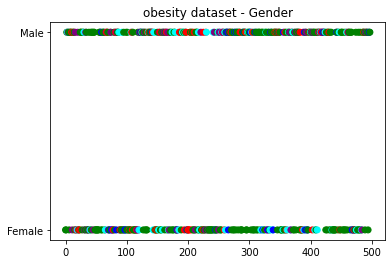

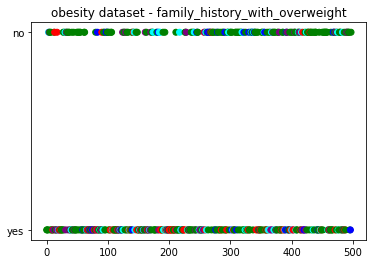

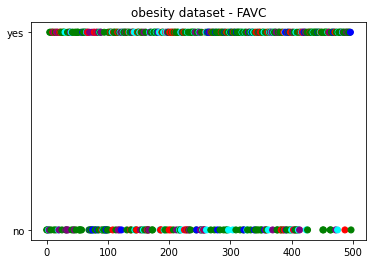

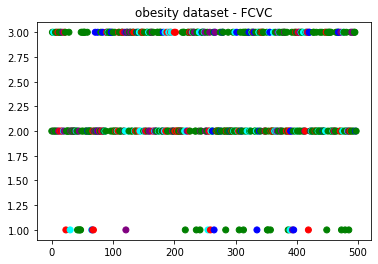

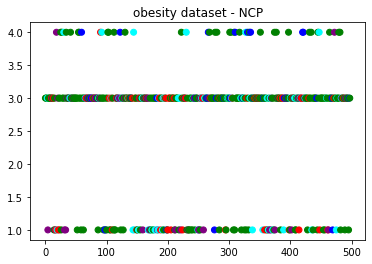

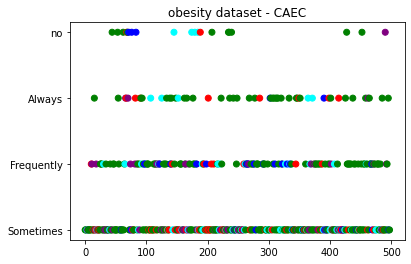

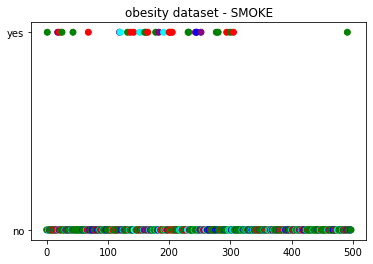

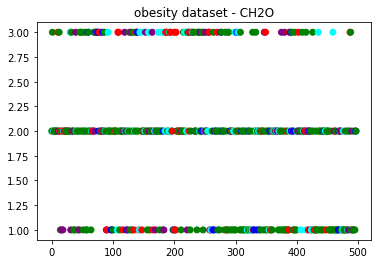

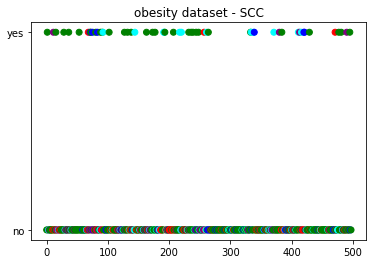

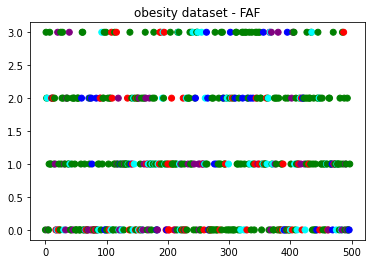

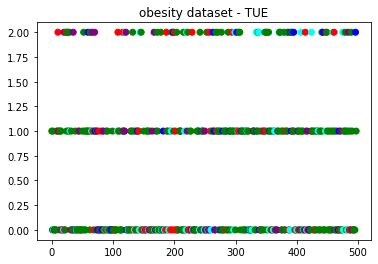

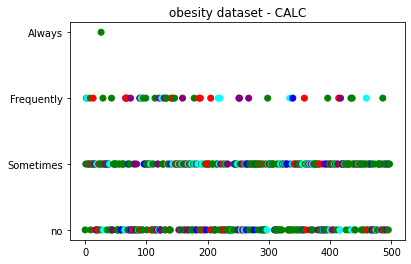

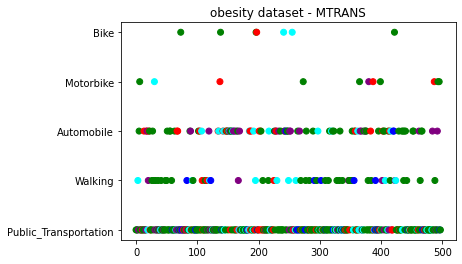

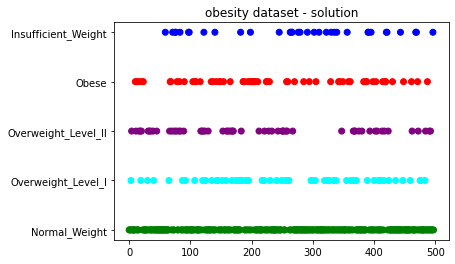

In [37]:
# Re-graph the data

for col in data:
    graph_attribute(data, "obesity", col, "solution")

In [136]:
# Data Preprocessing 

data_numpy = data.to_numpy()

data_rows, data_cols = data_numpy.shape

X = data_numpy[:, 0:data_cols-1]
Y = data_numpy[:,data_cols-1]

# Encode both X and Y, one-hot encoding the latter at the end. 

from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

encoder = LabelEncoder()

X_rows, X_cols = X.shape

X_encoded = X.copy()

for i in range(0,X_cols):
    # Only spend time encoding the columns that need it. 
    encode_row = False
    try:
        test = X_encoded[:,i].astype("float")
    except:
        encode_row = True
    if encode_row:
        X_encoded[:,i]  = encoder.fit_transform(X_encoded[:,i])
        
X_encoded = X_encoded.astype("float")

Y_encoded = encoder.fit_transform(Y).astype("float")
Y_dummy = to_categorical(Y_encoded)

X_encoded

array([[0.000000e+00, 1.000000e+00, 0.000000e+00, 2.000000e+00,
        3.000000e+00, 2.000000e+00, 0.000000e+00, 2.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 3.000000e+00,
        3.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 3.000000e+00,
        3.000000e+00, 2.000000e+00, 1.000000e+00, 3.000000e+00,
        1.000000e+00, 3.000000e+00, 0.000000e+00, 2.000000e+00,
        3.000000e+00],
       [1.000000e+00, 1.000000e+00, 0.000000e+00, 2.000000e+00,
        3.000000e+00, 2.000000e+00, 0.000000e+00, 2.000000e+00,
        0.000000e+00, 2.000000e+00, 1.000000e+00, 1.000000e+00,
        3.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, 3.000000e+00,
        3.000000e+00, 2.000000e+00, 0.000000e+00, 2.000000e+00,
        0.000000e+00, 2.000000e+00, 0.000000e+00, 1.000000e+00,
        4.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, 2.000000e+00,
        1.000000e+00, 2.000000e+00, 0.000000e+00, 2.000000e+00,
        0.00

In [154]:
# Model Spot Check - Known Algorithms 

nn_epochs = 200
nn_batch_size = 10
knn_n_neighbors = 17
knn_metric = "euclidean"
dt_criterion = "entropy"
rf_criterion = "gini"
rf_n_estimators = 150
rf_max_depth = None
svm_C = 2.0
svm_kernel = "rbf"

X_encoded_rows, X_encoded_cols = X_encoded.shape
Y_dummy_rows, Y_dummy_cols = Y_dummy.shape

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def baseline_nn():
    model = Sequential()
    model.add(Dense(25, input_dim=X_encoded_cols, activation="relu"))
    model.add(Dense(Y_dummy_cols, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model
def baseline_knn():
    return KNeighborsClassifier(n_neighbors=knn_n_neighbors,metric=knn_metric)
def baseline_gnb():
    return GaussianNB()
def baseline_dt():
    return DecisionTreeClassifier(criterion=dt_criterion)
def baseline_rf():
    return RandomForestClassifier(criterion=rf_criterion,max_depth=rf_max_depth,n_estimators=rf_n_estimators)
def baseline_svm():
    return SVC(C=svm_C, kernel=svm_kernel)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

kfold = KFold(n_splits=10, shuffle=True)

def model_pipeline(model):
    estimators = []
    estimators.append(("standardize",StandardScaler()))
    estimators.append(("clf", model))
    return Pipeline(estimators)

def model_evaluation(modelName, pipeline, X_data, Y_data, cv):
    result = cross_val_score(pipeline, X_data, Y_data, cv=cv, scoring="accuracy")
    print("Baseline " + modelName + ": %.2f (%.2f)" % (result.mean()*100,result.std()*100))

In [138]:
#pipeline_nn = model_pipeline(KerasClassifier(build_fn=baseline_nn, epochs=nn_epochs, batch_size=nn_batch_size))
estimators = []
estimators.append(("standardize",StandardScaler()))
estimators.append(("clf", KerasClassifier(build_fn=baseline_nn, epochs=nn_epochs, batch_size=nn_batch_size)))
pipeline_nn = Pipeline(estimators)

result_nn = cross_val_score(pipeline_nn, X_encoded, Y_dummy, cv=kfold)#, scoring="accuracy")

Epoch 1/200
190/190 [==============================] - 1s 953us/step - loss: 1.3495 - accuracy: 0.5024
Epoch 2/200
190/190 [==============================] - 0s 963us/step - loss: 1.1409 - accuracy: 0.5819
Epoch 3/200
190/190 [==============================] - 0s 993us/step - loss: 1.0605 - accuracy: 0.6003
Epoch 4/200
190/190 [==============================] - 0s 941us/step - loss: 1.0153 - accuracy: 0.6187
Epoch 5/200
190/190 [==============================] - 0s 975us/step - loss: 0.9837 - accuracy: 0.6345
Epoch 6/200
190/190 [==============================] - 0s 943us/step - loss: 0.9557 - accuracy: 0.6477
Epoch 7/200
190/190 [==============================] - 0s 924us/step - loss: 0.9329 - accuracy: 0.6524
Epoch 8/200
190/190 [==============================] - 0s 928us/step - loss: 0.9117 - accuracy: 0.6598
Epoch 9/200
190/190 [==============================] - 0s 964us/step - loss: 0.8930 - accuracy: 0.6688
Epoch 10/200
190/190 [==============================] - 0s 925us/step - l

190/190 [==============================] - 0s 919us/step - loss: 0.6346 - accuracy: 0.7678
Epoch 80/200
190/190 [==============================] - 0s 907us/step - loss: 0.6334 - accuracy: 0.7730
Epoch 81/200
190/190 [==============================] - 0s 894us/step - loss: 0.6337 - accuracy: 0.7783
Epoch 82/200
190/190 [==============================] - 0s 918us/step - loss: 0.6320 - accuracy: 0.7704
Epoch 83/200
190/190 [==============================] - 0s 907us/step - loss: 0.6304 - accuracy: 0.7778
Epoch 84/200
190/190 [==============================] - 0s 915us/step - loss: 0.6290 - accuracy: 0.7794
Epoch 85/200
190/190 [==============================] - 0s 899us/step - loss: 0.6289 - accuracy: 0.7715
Epoch 86/200
190/190 [==============================] - 0s 923us/step - loss: 0.6284 - accuracy: 0.7778
Epoch 87/200
190/190 [==============================] - 0s 933us/step - loss: 0.6274 - accuracy: 0.7751
Epoch 88/200
190/190 [==============================] - 0s 915us/step - loss:

190/190 [==============================] - 0s 940us/step - loss: 0.5820 - accuracy: 0.7878
Epoch 158/200
190/190 [==============================] - 0s 939us/step - loss: 0.5829 - accuracy: 0.7899
Epoch 159/200
190/190 [==============================] - 0s 936us/step - loss: 0.5832 - accuracy: 0.7936
Epoch 160/200
190/190 [==============================] - 0s 957us/step - loss: 0.5818 - accuracy: 0.7920
Epoch 161/200
190/190 [==============================] - 0s 938us/step - loss: 0.5812 - accuracy: 0.7899
Epoch 162/200
190/190 [==============================] - 0s 913us/step - loss: 0.5811 - accuracy: 0.7883
Epoch 163/200
190/190 [==============================] - 0s 926us/step - loss: 0.5806 - accuracy: 0.7967
Epoch 164/200
190/190 [==============================] - 0s 929us/step - loss: 0.5803 - accuracy: 0.7883
Epoch 165/200
190/190 [==============================] - 0s 943us/step - loss: 0.5802 - accuracy: 0.7946
Epoch 166/200
190/190 [==============================] - 0s 942us/ste

190/190 [==============================] - 0s 884us/step - loss: 0.6959 - accuracy: 0.7474
Epoch 35/200
190/190 [==============================] - 0s 852us/step - loss: 0.6904 - accuracy: 0.7516
Epoch 36/200
190/190 [==============================] - 0s 863us/step - loss: 0.6892 - accuracy: 0.7511
Epoch 37/200
190/190 [==============================] - 0s 933us/step - loss: 0.6867 - accuracy: 0.7521
Epoch 38/200
190/190 [==============================] - 0s 909us/step - loss: 0.6842 - accuracy: 0.7505
Epoch 39/200
190/190 [==============================] - 0s 870us/step - loss: 0.6811 - accuracy: 0.7547
Epoch 40/200
190/190 [==============================] - 0s 872us/step - loss: 0.6789 - accuracy: 0.7616
Epoch 41/200
190/190 [==============================] - 0s 861us/step - loss: 0.6767 - accuracy: 0.7600
Epoch 42/200
190/190 [==============================] - 0s 860us/step - loss: 0.6723 - accuracy: 0.7595
Epoch 43/200
190/190 [==============================] - 0s 890us/step - loss:

190/190 [==============================] - 0s 878us/step - loss: 0.5938 - accuracy: 0.7958
Epoch 113/200
190/190 [==============================] - 0s 922us/step - loss: 0.5917 - accuracy: 0.7947
Epoch 114/200
190/190 [==============================] - 0s 875us/step - loss: 0.5921 - accuracy: 0.8000
Epoch 115/200
190/190 [==============================] - 0s 871us/step - loss: 0.5913 - accuracy: 0.7947
Epoch 116/200
190/190 [==============================] - 0s 874us/step - loss: 0.5918 - accuracy: 0.7942
Epoch 117/200
190/190 [==============================] - 0s 882us/step - loss: 0.5913 - accuracy: 0.7984
Epoch 118/200
190/190 [==============================] - 0s 879us/step - loss: 0.5891 - accuracy: 0.7958
Epoch 119/200
190/190 [==============================] - 0s 911us/step - loss: 0.5892 - accuracy: 0.7953
Epoch 120/200
190/190 [==============================] - 0s 872us/step - loss: 0.5904 - accuracy: 0.8032
Epoch 121/200
190/190 [==============================] - 0s 899us/ste

190/190 [==============================] - 0s 916us/step - loss: 0.5585 - accuracy: 0.8058
Epoch 191/200
190/190 [==============================] - 0s 869us/step - loss: 0.5586 - accuracy: 0.8068
Epoch 192/200
190/190 [==============================] - 0s 868us/step - loss: 0.5585 - accuracy: 0.8058
Epoch 193/200
190/190 [==============================] - 0s 860us/step - loss: 0.5575 - accuracy: 0.8105
Epoch 194/200
190/190 [==============================] - 0s 866us/step - loss: 0.5556 - accuracy: 0.8079
Epoch 195/200
190/190 [==============================] - 0s 888us/step - loss: 0.5559 - accuracy: 0.8074
Epoch 196/200
190/190 [==============================] - 0s 964us/step - loss: 0.5589 - accuracy: 0.8068
Epoch 197/200
190/190 [==============================] - 0s 917us/step - loss: 0.5556 - accuracy: 0.8084
Epoch 198/200
190/190 [==============================] - 0s 877us/step - loss: 0.5539 - accuracy: 0.8053
Epoch 199/200
190/190 [==============================] - 0s 871us/ste

190/190 [==============================] - 0s 1ms/step - loss: 0.6550 - accuracy: 0.7616
Epoch 69/200
190/190 [==============================] - 0s 885us/step - loss: 0.6548 - accuracy: 0.7647
Epoch 70/200
190/190 [==============================] - 0s 865us/step - loss: 0.6528 - accuracy: 0.7611
Epoch 71/200
190/190 [==============================] - 0s 941us/step - loss: 0.6521 - accuracy: 0.7647
Epoch 72/200
190/190 [==============================] - 0s 1ms/step - loss: 0.6506 - accuracy: 0.7637
Epoch 73/200
190/190 [==============================] - 0s 1ms/step - loss: 0.6491 - accuracy: 0.7626
Epoch 74/200
190/190 [==============================] - 0s 1ms/step - loss: 0.6492 - accuracy: 0.7663
Epoch 75/200
190/190 [==============================] - 0s 958us/step - loss: 0.6456 - accuracy: 0.7732
Epoch 76/200
190/190 [==============================] - 0s 946us/step - loss: 0.6455 - accuracy: 0.7700
Epoch 77/200
190/190 [==============================] - 0s 914us/step - loss: 0.6455 

190/190 [==============================] - 0s 892us/step - loss: 0.5909 - accuracy: 0.7863
Epoch 147/200
190/190 [==============================] - 0s 889us/step - loss: 0.5892 - accuracy: 0.7842
Epoch 148/200
190/190 [==============================] - 0s 878us/step - loss: 0.5887 - accuracy: 0.7911
Epoch 149/200
190/190 [==============================] - 0s 920us/step - loss: 0.5880 - accuracy: 0.7905
Epoch 150/200
190/190 [==============================] - 0s 880us/step - loss: 0.5872 - accuracy: 0.7926
Epoch 151/200
190/190 [==============================] - 0s 931us/step - loss: 0.5864 - accuracy: 0.7911
Epoch 152/200
190/190 [==============================] - 0s 901us/step - loss: 0.5862 - accuracy: 0.7889
Epoch 153/200
190/190 [==============================] - 0s 872us/step - loss: 0.5868 - accuracy: 0.7932
Epoch 154/200
190/190 [==============================] - 0s 889us/step - loss: 0.5856 - accuracy: 0.7921
Epoch 155/200
190/190 [==============================] - 0s 875us/ste

190/190 [==============================] - 0s 882us/step - loss: 0.7273 - accuracy: 0.7463
Epoch 25/200
190/190 [==============================] - 0s 927us/step - loss: 0.7211 - accuracy: 0.7468
Epoch 26/200
190/190 [==============================] - 0s 893us/step - loss: 0.7154 - accuracy: 0.7484
Epoch 27/200
190/190 [==============================] - 0s 923us/step - loss: 0.7107 - accuracy: 0.7458
Epoch 28/200
190/190 [==============================] - 0s 954us/step - loss: 0.7061 - accuracy: 0.7511
Epoch 29/200
190/190 [==============================] - 0s 998us/step - loss: 0.7006 - accuracy: 0.7453
Epoch 30/200
190/190 [==============================] - 0s 917us/step - loss: 0.6976 - accuracy: 0.7458
Epoch 31/200
190/190 [==============================] - 0s 909us/step - loss: 0.6940 - accuracy: 0.7532
Epoch 32/200
190/190 [==============================] - 0s 923us/step - loss: 0.6883 - accuracy: 0.7563
Epoch 33/200
190/190 [==============================] - 0s 936us/step - loss:

190/190 [==============================] - 0s 921us/step - loss: 0.5843 - accuracy: 0.7932
Epoch 104/200
190/190 [==============================] - 0s 913us/step - loss: 0.5834 - accuracy: 0.7905
Epoch 105/200
190/190 [==============================] - 0s 944us/step - loss: 0.5824 - accuracy: 0.7947
Epoch 106/200
190/190 [==============================] - 0s 867us/step - loss: 0.5808 - accuracy: 0.7932
Epoch 107/200
190/190 [==============================] - 0s 975us/step - loss: 0.5810 - accuracy: 0.7984
Epoch 108/200
190/190 [==============================] - 0s 933us/step - loss: 0.5801 - accuracy: 0.7921
Epoch 109/200
190/190 [==============================] - 0s 954us/step - loss: 0.5793 - accuracy: 0.7916
Epoch 110/200
190/190 [==============================] - 0s 945us/step - loss: 0.5786 - accuracy: 0.7947
Epoch 111/200
190/190 [==============================] - 0s 1ms/step - loss: 0.5786 - accuracy: 0.7932
Epoch 112/200
190/190 [==============================] - 0s 1ms/step - 

190/190 [==============================] - 0s 1ms/step - loss: 0.5455 - accuracy: 0.8042
Epoch 182/200
190/190 [==============================] - 0s 1ms/step - loss: 0.5448 - accuracy: 0.8095
Epoch 183/200
190/190 [==============================] - 0s 1ms/step - loss: 0.5446 - accuracy: 0.8021
Epoch 184/200
190/190 [==============================] - 0s 917us/step - loss: 0.5441 - accuracy: 0.8016
Epoch 185/200
190/190 [==============================] - 0s 1ms/step - loss: 0.5444 - accuracy: 0.8079
Epoch 186/200
190/190 [==============================] - 0s 1ms/step - loss: 0.5441 - accuracy: 0.8068
Epoch 187/200
190/190 [==============================] - 0s 891us/step - loss: 0.5425 - accuracy: 0.8089
Epoch 188/200
190/190 [==============================] - 0s 914us/step - loss: 0.5433 - accuracy: 0.8032
Epoch 189/200
190/190 [==============================] - 0s 949us/step - loss: 0.5434 - accuracy: 0.8100
Epoch 190/200
190/190 [==============================] - 0s 937us/step - loss: 

190/190 [==============================] - 0s 911us/step - loss: 0.6352 - accuracy: 0.7695
Epoch 60/200
190/190 [==============================] - 0s 906us/step - loss: 0.6334 - accuracy: 0.7711
Epoch 61/200
190/190 [==============================] - 0s 936us/step - loss: 0.6310 - accuracy: 0.7747
Epoch 62/200
190/190 [==============================] - 0s 925us/step - loss: 0.6317 - accuracy: 0.7721
Epoch 63/200
190/190 [==============================] - 0s 871us/step - loss: 0.6289 - accuracy: 0.7726
Epoch 64/200
190/190 [==============================] - 0s 867us/step - loss: 0.6282 - accuracy: 0.7747
Epoch 65/200
190/190 [==============================] - 0s 899us/step - loss: 0.6265 - accuracy: 0.7742
Epoch 66/200
190/190 [==============================] - 0s 865us/step - loss: 0.6248 - accuracy: 0.7742
Epoch 67/200
190/190 [==============================] - 0s 865us/step - loss: 0.6226 - accuracy: 0.7763
Epoch 68/200
190/190 [==============================] - 0s 870us/step - loss:

190/190 [==============================] - 0s 904us/step - loss: 0.5577 - accuracy: 0.7984
Epoch 138/200
190/190 [==============================] - 0s 906us/step - loss: 0.5570 - accuracy: 0.8032
Epoch 139/200
190/190 [==============================] - 0s 886us/step - loss: 0.5581 - accuracy: 0.7989
Epoch 140/200
190/190 [==============================] - 0s 1ms/step - loss: 0.5558 - accuracy: 0.8000
Epoch 141/200
190/190 [==============================] - 0s 1ms/step - loss: 0.5552 - accuracy: 0.8005
Epoch 142/200
190/190 [==============================] - 0s 891us/step - loss: 0.5548 - accuracy: 0.8005
Epoch 143/200
190/190 [==============================] - 0s 882us/step - loss: 0.5555 - accuracy: 0.7979
Epoch 144/200
190/190 [==============================] - 0s 865us/step - loss: 0.5545 - accuracy: 0.8011
Epoch 145/200
190/190 [==============================] - 0s 867us/step - loss: 0.5543 - accuracy: 0.8000
Epoch 146/200
190/190 [==============================] - 0s 1ms/step - lo

190/190 [==============================] - 0s 854us/step - loss: 0.8310 - accuracy: 0.7016
Epoch 15/200
190/190 [==============================] - 0s 890us/step - loss: 0.8223 - accuracy: 0.6995
Epoch 16/200
190/190 [==============================] - 0s 858us/step - loss: 0.8143 - accuracy: 0.6995
Epoch 17/200
190/190 [==============================] - 0s 852us/step - loss: 0.8068 - accuracy: 0.7063
Epoch 18/200
190/190 [==============================] - 0s 845us/step - loss: 0.7993 - accuracy: 0.7079
Epoch 19/200
190/190 [==============================] - 0s 862us/step - loss: 0.7927 - accuracy: 0.7111
Epoch 20/200
190/190 [==============================] - 0s 950us/step - loss: 0.7854 - accuracy: 0.7121
Epoch 21/200
190/190 [==============================] - 0s 875us/step - loss: 0.7796 - accuracy: 0.7147
Epoch 22/200
190/190 [==============================] - 0s 849us/step - loss: 0.7731 - accuracy: 0.7205
Epoch 23/200
190/190 [==============================] - 0s 908us/step - loss:

190/190 [==============================] - 0s 924us/step - loss: 0.6028 - accuracy: 0.7858
Epoch 93/200
190/190 [==============================] - 0s 923us/step - loss: 0.6015 - accuracy: 0.7837
Epoch 94/200
190/190 [==============================] - 0s 897us/step - loss: 0.6016 - accuracy: 0.7811
Epoch 95/200
190/190 [==============================] - 0s 944us/step - loss: 0.6005 - accuracy: 0.7816
Epoch 96/200
190/190 [==============================] - 0s 895us/step - loss: 0.5988 - accuracy: 0.7826
Epoch 97/200
190/190 [==============================] - 0s 876us/step - loss: 0.5974 - accuracy: 0.7847
Epoch 98/200
190/190 [==============================] - 0s 870us/step - loss: 0.5950 - accuracy: 0.7847
Epoch 99/200
190/190 [==============================] - 0s 871us/step - loss: 0.5958 - accuracy: 0.7816
Epoch 100/200
190/190 [==============================] - 0s 856us/step - loss: 0.5945 - accuracy: 0.7832
Epoch 101/200
190/190 [==============================] - 0s 849us/step - los

190/190 [==============================] - 0s 861us/step - loss: 0.5467 - accuracy: 0.8158
Epoch 171/200
190/190 [==============================] - 0s 906us/step - loss: 0.5457 - accuracy: 0.8116
Epoch 172/200
190/190 [==============================] - 0s 963us/step - loss: 0.5445 - accuracy: 0.8121
Epoch 173/200
190/190 [==============================] - 0s 889us/step - loss: 0.5438 - accuracy: 0.8158
Epoch 174/200
190/190 [==============================] - 0s 853us/step - loss: 0.5449 - accuracy: 0.8142
Epoch 175/200
190/190 [==============================] - 0s 877us/step - loss: 0.5440 - accuracy: 0.8111
Epoch 176/200
190/190 [==============================] - 0s 906us/step - loss: 0.5421 - accuracy: 0.8137
Epoch 177/200
190/190 [==============================] - 0s 904us/step - loss: 0.5431 - accuracy: 0.8105
Epoch 178/200
190/190 [==============================] - 0s 861us/step - loss: 0.5420 - accuracy: 0.8142
Epoch 179/200
190/190 [==============================] - 0s 849us/ste

190/190 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.7568
Epoch 48/200
190/190 [==============================] - 0s 944us/step - loss: 0.6813 - accuracy: 0.7621
Epoch 49/200
190/190 [==============================] - 0s 973us/step - loss: 0.6796 - accuracy: 0.7605
Epoch 50/200
190/190 [==============================] - 0s 928us/step - loss: 0.6775 - accuracy: 0.7626
Epoch 51/200
190/190 [==============================] - 0s 869us/step - loss: 0.6749 - accuracy: 0.7616
Epoch 52/200
190/190 [==============================] - 0s 880us/step - loss: 0.6750 - accuracy: 0.7626
Epoch 53/200
190/190 [==============================] - 0s 891us/step - loss: 0.6708 - accuracy: 0.7632
Epoch 54/200
190/190 [==============================] - 0s 930us/step - loss: 0.6716 - accuracy: 0.7679
Epoch 55/200
190/190 [==============================] - 0s 878us/step - loss: 0.6697 - accuracy: 0.7637
Epoch 56/200
190/190 [==============================] - 0s 868us/step - loss: 0

190/190 [==============================] - 0s 909us/step - loss: 0.6038 - accuracy: 0.7911
Epoch 126/200
190/190 [==============================] - 0s 899us/step - loss: 0.6024 - accuracy: 0.7868
Epoch 127/200
190/190 [==============================] - 0s 904us/step - loss: 0.6031 - accuracy: 0.7826
Epoch 128/200
190/190 [==============================] - 0s 883us/step - loss: 0.6022 - accuracy: 0.7832
Epoch 129/200
190/190 [==============================] - 0s 905us/step - loss: 0.6012 - accuracy: 0.7884
Epoch 130/200
190/190 [==============================] - 0s 905us/step - loss: 0.6026 - accuracy: 0.7874
Epoch 131/200
190/190 [==============================] - 0s 924us/step - loss: 0.6016 - accuracy: 0.7884
Epoch 132/200
190/190 [==============================] - 0s 969us/step - loss: 0.6008 - accuracy: 0.7879
Epoch 133/200
190/190 [==============================] - 0s 926us/step - loss: 0.6008 - accuracy: 0.7858
Epoch 134/200
190/190 [==============================] - 0s 918us/ste

190/190 [==============================] - 0s 861us/step - loss: 1.2650 - accuracy: 0.5195
Epoch 3/200
190/190 [==============================] - 0s 897us/step - loss: 1.1280 - accuracy: 0.5695
Epoch 4/200
190/190 [==============================] - 0s 873us/step - loss: 1.0579 - accuracy: 0.5974
Epoch 5/200
190/190 [==============================] - 0s 866us/step - loss: 1.0156 - accuracy: 0.6063
Epoch 6/200
190/190 [==============================] - 0s 879us/step - loss: 0.9856 - accuracy: 0.6216
Epoch 7/200
190/190 [==============================] - 0s 867us/step - loss: 0.9636 - accuracy: 0.6368
Epoch 8/200
190/190 [==============================] - 0s 865us/step - loss: 0.9444 - accuracy: 0.6474
Epoch 9/200
190/190 [==============================] - 0s 859us/step - loss: 0.9259 - accuracy: 0.6600
Epoch 10/200
190/190 [==============================] - 0s 868us/step - loss: 0.9102 - accuracy: 0.6637
Epoch 11/200
190/190 [==============================] - 0s 861us/step - loss: 0.8966

190/190 [==============================] - 0s 918us/step - loss: 0.6389 - accuracy: 0.7663
Epoch 82/200
190/190 [==============================] - 0s 931us/step - loss: 0.6366 - accuracy: 0.7711
Epoch 83/200
190/190 [==============================] - 0s 888us/step - loss: 0.6357 - accuracy: 0.7705
Epoch 84/200
190/190 [==============================] - 0s 868us/step - loss: 0.6350 - accuracy: 0.7763
Epoch 85/200
190/190 [==============================] - 0s 868us/step - loss: 0.6323 - accuracy: 0.7789
Epoch 86/200
190/190 [==============================] - 0s 862us/step - loss: 0.6324 - accuracy: 0.7747
Epoch 87/200
190/190 [==============================] - 0s 866us/step - loss: 0.6291 - accuracy: 0.7774
Epoch 88/200
190/190 [==============================] - 0s 873us/step - loss: 0.6301 - accuracy: 0.7774
Epoch 89/200
190/190 [==============================] - 0s 879us/step - loss: 0.6287 - accuracy: 0.7742
Epoch 90/200
190/190 [==============================] - 0s 865us/step - loss:

190/190 [==============================] - 0s 871us/step - loss: 0.5787 - accuracy: 0.7889
Epoch 160/200
190/190 [==============================] - 0s 891us/step - loss: 0.5772 - accuracy: 0.7868
Epoch 161/200
190/190 [==============================] - 0s 872us/step - loss: 0.5777 - accuracy: 0.7900
Epoch 162/200
190/190 [==============================] - 0s 874us/step - loss: 0.5782 - accuracy: 0.7916
Epoch 163/200
190/190 [==============================] - 0s 871us/step - loss: 0.5761 - accuracy: 0.7947
Epoch 164/200
190/190 [==============================] - 0s 869us/step - loss: 0.5769 - accuracy: 0.7868
Epoch 165/200
190/190 [==============================] - 0s 860us/step - loss: 0.5754 - accuracy: 0.7953
Epoch 166/200
190/190 [==============================] - 0s 884us/step - loss: 0.5748 - accuracy: 0.7921
Epoch 167/200
190/190 [==============================] - 0s 858us/step - loss: 0.5754 - accuracy: 0.7911
Epoch 168/200
190/190 [==============================] - 0s 853us/ste

190/190 [==============================] - 0s 936us/step - loss: 0.6975 - accuracy: 0.7537
Epoch 37/200
190/190 [==============================] - 0s 898us/step - loss: 0.6946 - accuracy: 0.7547
Epoch 38/200
190/190 [==============================] - 0s 941us/step - loss: 0.6919 - accuracy: 0.7568
Epoch 39/200
190/190 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.7584
Epoch 40/200
190/190 [==============================] - 0s 871us/step - loss: 0.6852 - accuracy: 0.7574
Epoch 41/200
190/190 [==============================] - 0s 861us/step - loss: 0.6825 - accuracy: 0.7616
Epoch 42/200
190/190 [==============================] - 0s 868us/step - loss: 0.6797 - accuracy: 0.7621
Epoch 43/200
190/190 [==============================] - 0s 861us/step - loss: 0.6770 - accuracy: 0.7637
Epoch 44/200
190/190 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.7589
Epoch 45/200
190/190 [==============================] - 0s 917us/step - loss: 0.6

190/190 [==============================] - 0s 872us/step - loss: 0.5818 - accuracy: 0.7963
Epoch 115/200
190/190 [==============================] - 0s 857us/step - loss: 0.5795 - accuracy: 0.7979
Epoch 116/200
190/190 [==============================] - 0s 876us/step - loss: 0.5798 - accuracy: 0.7947
Epoch 117/200
190/190 [==============================] - 0s 867us/step - loss: 0.5781 - accuracy: 0.7932
Epoch 118/200
190/190 [==============================] - 0s 861us/step - loss: 0.5782 - accuracy: 0.7926
Epoch 119/200
190/190 [==============================] - 0s 860us/step - loss: 0.5763 - accuracy: 0.8026
Epoch 120/200
190/190 [==============================] - 0s 859us/step - loss: 0.5762 - accuracy: 0.7974
Epoch 121/200
190/190 [==============================] - 0s 851us/step - loss: 0.5772 - accuracy: 0.7968
Epoch 122/200
190/190 [==============================] - 0s 873us/step - loss: 0.5740 - accuracy: 0.8011
Epoch 123/200
190/190 [==============================] - 0s 864us/ste

190/190 [==============================] - 0s 882us/step - loss: 0.5368 - accuracy: 0.8142
Epoch 193/200
190/190 [==============================] - 0s 894us/step - loss: 0.5366 - accuracy: 0.8158
Epoch 194/200
190/190 [==============================] - 0s 874us/step - loss: 0.5359 - accuracy: 0.8211
Epoch 195/200
190/190 [==============================] - 0s 862us/step - loss: 0.5342 - accuracy: 0.8226
Epoch 196/200
190/190 [==============================] - 0s 873us/step - loss: 0.5335 - accuracy: 0.8163
Epoch 197/200
190/190 [==============================] - 0s 866us/step - loss: 0.5345 - accuracy: 0.8153
Epoch 198/200
190/190 [==============================] - 0s 852us/step - loss: 0.5347 - accuracy: 0.8179
Epoch 199/200
190/190 [==============================] - 0s 883us/step - loss: 0.5327 - accuracy: 0.8200
Epoch 200/200
22/22 [==============================] - 0s 823us/step - loss: 0.8288 - accuracy: 0.7630
Epoch 1/200
190/190 [==============================] - 1s 884us/step - 

190/190 [==============================] - 0s 900us/step - loss: 0.6125 - accuracy: 0.7826
Epoch 71/200
190/190 [==============================] - 0s 861us/step - loss: 0.6117 - accuracy: 0.7805
Epoch 72/200
190/190 [==============================] - 0s 859us/step - loss: 0.6092 - accuracy: 0.7816
Epoch 73/200
190/190 [==============================] - 0s 852us/step - loss: 0.6082 - accuracy: 0.7811
Epoch 74/200
190/190 [==============================] - 0s 861us/step - loss: 0.6066 - accuracy: 0.7753
Epoch 75/200
190/190 [==============================] - 0s 891us/step - loss: 0.6052 - accuracy: 0.7832
Epoch 76/200
190/190 [==============================] - 0s 855us/step - loss: 0.6042 - accuracy: 0.7837
Epoch 77/200
190/190 [==============================] - 0s 872us/step - loss: 0.6030 - accuracy: 0.7779
Epoch 78/200
190/190 [==============================] - 0s 855us/step - loss: 0.6012 - accuracy: 0.7858
Epoch 79/200
190/190 [==============================] - 0s 849us/step - loss:

190/190 [==============================] - 0s 857us/step - loss: 0.5437 - accuracy: 0.8089
Epoch 149/200
190/190 [==============================] - 0s 854us/step - loss: 0.5419 - accuracy: 0.8079
Epoch 150/200
190/190 [==============================] - 0s 852us/step - loss: 0.5419 - accuracy: 0.8032
Epoch 151/200
190/190 [==============================] - 0s 863us/step - loss: 0.5425 - accuracy: 0.8084
Epoch 152/200
190/190 [==============================] - 0s 880us/step - loss: 0.5418 - accuracy: 0.8063
Epoch 153/200
190/190 [==============================] - 0s 860us/step - loss: 0.5396 - accuracy: 0.8089
Epoch 154/200
190/190 [==============================] - 0s 860us/step - loss: 0.5385 - accuracy: 0.8063
Epoch 155/200
190/190 [==============================] - 0s 862us/step - loss: 0.5400 - accuracy: 0.8058
Epoch 156/200
190/190 [==============================] - 0s 863us/step - loss: 0.5381 - accuracy: 0.8047
Epoch 157/200
190/190 [==============================] - 0s 861us/ste

In [139]:
print("Baseline nn: %.2f (%.2f)" % (result_nn.mean()*100,result_nn.std()*100))

Baseline nn: 71.62 (4.94)


In [157]:
model_evaluation("KNN", model_pipeline(baseline_knn()), X_encoded, Y_encoded, kfold)
model_evaluation("GNB", model_pipeline(baseline_gnb()), X_encoded, Y_encoded, kfold)
model_evaluation("DT", model_pipeline(baseline_dt()), X_encoded, Y_encoded, kfold)
model_evaluation("RF", model_pipeline(baseline_rf()), X_encoded, Y_encoded, kfold)
model_evaluation("SVM", model_pipeline(baseline_svm()), X_encoded, Y_encoded, kfold)

Baseline KNN: 70.44 (3.10)
Baseline GNB: 55.04 (14.17)
Baseline DT: 74.80 (3.22)
Baseline RF: 82.00 (2.67)
Baseline SVM: 76.03 (2.65)


In [146]:
# New Algorithm (kinda) - Multinomial Naive Bayes
# Good for categorical problems (like this)

from sklearn.naive_bayes import MultinomialNB

def baseline_mnb():
    return MultinomialNB()

# NOTE: We do NOT use standard scaler within a pipeline because 
# Multinomial NB does not support negative values 
model_evaluation("MNB", baseline_mnb(), X_encoded, Y_encoded, kfold)

Baseline MNB: 48.56 (3.73)
